In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, GRU, Input, GlobalMaxPooling1D, LayerNormalization, Conv1D, Concatenate, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from pyvi import ViTokenizer
from pyvi import ViUtils
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
data = pd.read_excel('datatrain.xlsx')
data.head()


,id,thank_count,customer_id,rating,created_at,content,title
0,NaN,0,29007408,2,1680622562,Máy yếu . Giật lag .,Tiêu cực
1,NaN,0,5229895,4,1676870198,Không bật lên được,Tiêu cực
2,NaN,1,16968933,5,1658741347,Đừng nên mua chỉ phí tiền,Tiêu cực
3,NaN,0,10498768,4,1675745522,"Hệ điều hành phiên bản này không ổn định, được...",Tiêu cực
4,NaN,0,14122,5,1659937466,Dùng được 2 ngày thì sạc không vào,Tiêu cực


In [3]:
sentiment_data = pd.DataFrame({'input' : data['content'], 'label' : data['title']})
sentiment_data = sentiment_data.dropna()
sentiment_data = sentiment_data.reset_index(drop = True)
sentiment_data.head()


,input,label
0,Máy yếu . Giật lag .,Tiêu cực
1,Không bật lên được,Tiêu cực
2,Đừng nên mua chỉ phí tiền,Tiêu cực
3,"Hệ điều hành phiên bản này không ổn định, được...",Tiêu cực
4,Dùng được 2 ngày thì sạc không vào,Tiêu cực


In [4]:
input_data = sentiment_data['input'].values
input_label = sentiment_data['label'].values
label_dict = {'Tiêu cực': 0, 'Trung lập': 1, 'Tích cực': 2}
input_pre = []
label_with_accent = []

for idx, dt in enumerate(input_data):
    # Giữ nguyên văn bản gốc mà không chuyển đổi thành danh sách từ
    input_text_pre = dt  # Giữ nguyên chuỗi văn bản gốc

    # Chuyển đổi văn bản gốc thành dạng không có dấu
    input_text_pre_no_accent = ViUtils.remove_accents(input_text_pre)

    # Kiểm tra kiểu dữ liệu và đảm bảo nó là chuỗi
    if not isinstance(input_text_pre_no_accent, str):
        input_text_pre_no_accent = input_text_pre_no_accent.decode('utf-8')

    # Phân đoạn văn bản gốc và văn bản không có dấu
    input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
    input_text_pre_no_accent = ViTokenizer.tokenize(input_text_pre_no_accent)

    input_pre.append(input_text_pre_accent)
    input_pre.append(input_text_pre_no_accent)
    label_with_accent.append(input_label[idx])
    label_with_accent.append(input_label[idx])


In [8]:
label_with_accent

['Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tiêu cực',
 'Tích cực',
 'Tích cực',
 'Tích cực',
 'Tích cực',
 'Tích cực',

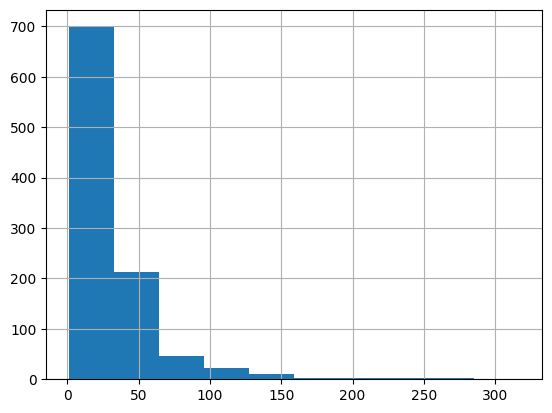

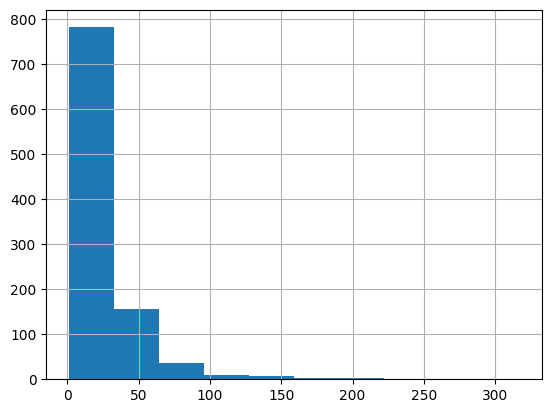

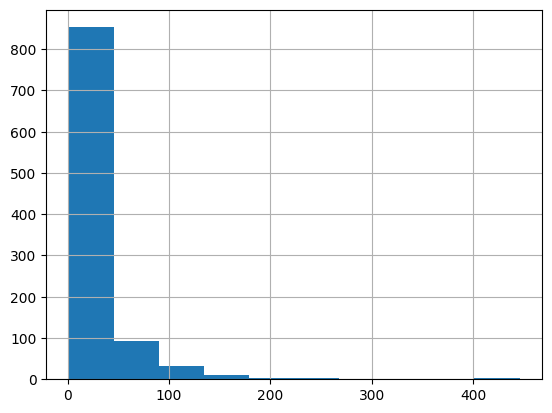

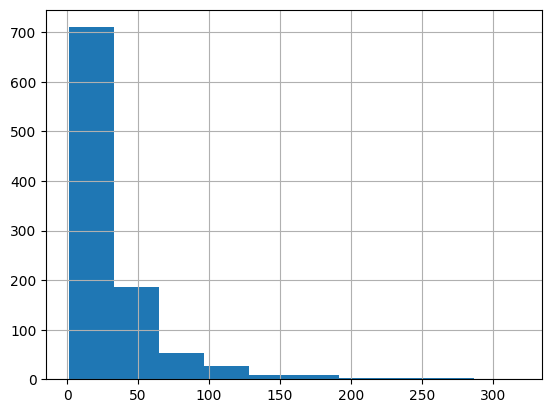

In [5]:
seq_len = [len(i.split()) for i in input_pre[0:1000]]
pd.Series( seq_len).hist( bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[1000:2000]]
pd.Series( seq_len).hist( bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[2000:3000]]
pd.Series( seq_len).hist( bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[3000:4000]]
pd.Series( seq_len).hist( bins = 10)
plt.show()




In [17]:
label_idx = [label_dict[i] for i in label_with_accent]
label_tf = tf.keras.utils.to_categorical(label_idx, num_classes=3)
label_tf
# Tạo dictionary ánh xạ từ số sang nhãn
reverse_label_dict = {v: k for k, v in label_dict.items()}

# Duyệt qua từng nhãn trong label_idx và in gộp thông tin
for i, label in enumerate(label_idx):
    nhan = reverse_label_dict[label]  # Tra cứu nhãn theo giá trị số
    one_hot = label_tf[i]  # Lấy vector one-hot tương ứng
    print(f"{nhan} label_idx[{i}] = {label}, one-hot encoding = {one_hot}")



Tiêu cực label_idx[0] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[1] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[2] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[3] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[4] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[5] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[6] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[7] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[8] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[9] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[10] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[11] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[12] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[13] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[14] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[15] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[16] = 0, one-hot encoding = [1. 0. 0.]
Tiêu cực label_idx[17] =

In [20]:
label_idx = [label_dict[i] for i in label_with_accent]
label_tf = tf.keras.utils.to_categorical(label_idx, num_classes=3)

tokenizer_data = Tokenizer(oov_token='<OOV>', filters = '', split = ' ')
tokenizer_data .fit_on_texts(input_pre)

tokenizer_data_text = tokenizer_data.texts_to_sequences(input_pre)
vec_data = pad_sequences(tokenizer_data_text, padding = 'post', maxlen = 820)

pickle.dump(tokenizer_data, open("tokenizer_data.pkl", "wb"))
print("input data.shape:", vec_data.shape)
data_vocab_size = len (tokenizer_data.word_index)+1
print("data_vocab_size: ", data_vocab_size)

x_train, x_test, y_train, y_test = train_test_split( vec_data, label_tf, test_size = 0.2, random_state = 42)
print("training sample: ", len(x_train))
print("test sample: ", len(x_test))
# Kiểm tra từ điển
print("Một số từ trong từ điển:", list(tokenizer_data.word_index.items())[:100])

# Kiểm tra một mẫu dữ liệu
print("Chuỗi gốc:", input_pre[0])
print("Chuỗi mã hóa:", tokenizer_data_text[0])
print("Chuỗi padding:", vec_data[0])
print("One-hot label:", y_train[0])



input data.shape: (10036, 820)
data_vocab_size:  6868
training sample:  8028
test sample:  2008
Một số từ trong từ điển: [('<OOV>', 1), (',', 2), ('.', 3), ('giao', 4), ('\n', 5), ('hàng', 6), ('hang', 7), ('mua', 8), ('nhanh', 9), ('may', 10), ('dung', 11), ('máy', 12), ('shop', 13), ('tiki', 14), ('co', 15), ('rất', 16), ('rat', 17), ('cho', 18), ('khong', 19), ('không', 20), ('mình', 21), ('minh', 22), ('có', 23), ('pin', 24), ('tốt', 25), ('tot', 26), ('ok', 27), ('ko', 28), ('thi', 29), ('1', 30), ('moi', 31), ('dep', 32), ('được', 33), ('duoc', 34), ('thì', 35), ('seal', 36), ('san', 37), ('trong', 38), ('dùng', 39), ('đẹp', 40), ('là', 41), ('khi', 42), ('la', 43), ('gia', 44), ('va', 45), ('và', 46), ('pham', 47), ('sản_phẩm', 48), ('nhung', 49), ('!', 50), ('hinh', 51), ('giá', 52), ('on', 53), ('de', 54), ('bao', 55), ('nen', 56), ('da', 57), ('nhưng', 58), ('voi', 59), ('nên', 60), ('qua', 61), ('do', 62), ('goi', 63), ('mới', 64), ('dien', 65), ('sau', 66), ('nhan', 67), ('

In [6]:
def generate_model():
    dropout_threshold = 0.4
    input_dim = data_vocab_size
    output_dim = 32
    input_length = 820
    initializer = tf.keras.initializers.GlorotNormal()

    input_layer = Input(shape=(input_length,))
    feature = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length,
                        embeddings_initializer="GlorotNormal")(input_layer)

    cnn_feature = Conv1D( filters = 32, kernel_size = 16, padding = 'same', activation = 'relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold )(cnn_feature)
    cnn_feature = Conv1D( filters = 32, kernel_size = 16, padding = 'same', activation = 'relu') (cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold )(cnn_feature)

    combine_feature = GlobalMaxPooling1D()(cnn_feature)
    combine_feature = LayerNormalization()(combine_feature)

    classifier = Dense(90, activation='relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(70, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(50, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(30, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(3, activation='softmax')(classifier)

    model = tf.keras.Model(inputs=input_layer, outputs=classifier)

    return model

model = generate_model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\LG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 820)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 820, 32)        │       219,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 820, 32)        │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 410, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 410, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 410, 32)        │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 205, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 205, 32)        │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 205, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 90)             │         2,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 70)             │         6,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,249 (1.02 MB)

 Trainable params: 267,249 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf


In [ ]:
# Hàm tạo mô hình với các tham số điều chỉnh
def generate_model(dropout_threshold=0.4, learning_rate=0.01, filters=32, kernel_size=32):
    input_dim = data_vocab_size
    output_dim = 32
    input_length = 820

    input_layer = Input(shape=(input_length,))
    feature = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length,
                        embeddings_initializer="GlorotNormal")(input_layer)

    cnn_feature = Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    cnn_feature = Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu')(cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)

    combine_feature = GlobalMaxPooling1D()(cnn_feature)
    combine_feature = LayerNormalization()(combine_feature)

    classifier = Dense(90, activation='relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(70, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(50, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(30, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(3, activation='softmax')(classifier)

    model = tf.keras.Model(inputs=input_layer, outputs=classifier)
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [13]:
# Định nghĩa KerasClassifier với hàm generate_model
model = KerasClassifier(
    model=generate_model,
    dropout_threshold=0.4,
    learning_rate=0.001,
    filters=32,
    kernel_size=32,
    epochs=10,
    batch_size=32,
    verbose=0
)

# Định nghĩa phạm vi giá trị cho các siêu tham số
param_grid = {
    'dropout_threshold': [0.4],
    'learning_rate': [0.01, 0.001],
    'filters': [32],
    'kernel_size': [16, 32],
    'batch_size': [64, 128, 256],
    'epochs': [5, 10, 15, 20]
}

# Thiết lập GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)


In [14]:
# Thực hiện Grid Search
grid_result = grid.fit(x_train, y_train)

# In kết quả của từng tổ hợp siêu tham số
print("Từng bộ tham số và kết quả:")
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], 
                             grid_result.cv_results_['std_test_score'], 
                             grid_result.cv_results_['params']):
    print(f"Độ chính xác trung bình: {mean:.4f} (std: {std:.4f}) với tham số: {params}")

# In kết quả tốt nhất
print("\nKết quả tốt nhất:")
print("Độ chính xác: %f sử dụng bộ tham số %s" % (grid_result.best_score_, grid_result.best_params_))


c:\Users\LG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Từng bộ tham số và kết quả:
Độ chính xác trung bình: 0.6572 (std: 0.0555) với tham số: {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 5, 'filters': 32, 'kernel_size': 16, 'learning_rate': 0.01}
Độ chính xác trung bình: 0.6850 (std: 0.0408) với tham số: {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 5, 'filters': 32, 'kernel_size': 16, 'learning_rate': 0.001}
Độ chính xác trung bình: 0.6282 (std: 0.0676) với tham số: {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 5, 'filters': 32, 'kernel_size': 32, 'learning_rate': 0.01}
Độ chính xác trung bình: 0.6637 (std: 0.0565) với tham số: {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 5, 'filters': 32, 'kernel_size': 32, 'learning_rate': 0.001}
Độ chính xác trung bình: 0.7652 (std: 0.0146) với tham số: {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 10, 'filters': 32, 'kernel_size': 16, 'learning_rate': 0.01}
Độ chính xác trung bình: 0.7794 (std: 0.0078) với tham số: {'batch_size': 64, 'dropout_threshold': 

In [17]:
from tabulate import tabulate

results = {
    "Mean Accuracy": grid_result.cv_results_['mean_test_score'],
    "Std Dev": grid_result.cv_results_['std_test_score'],
    "Parameters": grid_result.cv_results_['params']
}

results_df = pd.DataFrame(results)

# Hiển thị bảng kết quả
print("Bảng kết quả các tổ hợp siêu tham số:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

# Hiển thị kết quả tốt nhất
print("\nKết quả tốt nhất:")
print(f"Độ chính xác: {grid_result.best_score_:.4f} sử dụng bộ tham số {grid_result.best_params_}")

Bảng kết quả các tổ hợp siêu tham số:
+----+-----------------+-------------+-----------------------------------------------------------------------------------------------------------------------+
|    |   Mean Accuracy |     Std Dev | Parameters                                                                                                            |
+====+=================+=============+=======================================================================================================================+
|  0 |        0.6572   | 0.055479    | {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 5, 'filters': 32, 'kernel_size': 16, 'learning_rate': 0.01}    |
+----+-----------------+-------------+-----------------------------------------------------------------------------------------------------------------------+
|  1 |        0.684978 | 0.0408004   | {'batch_size': 64, 'dropout_threshold': 0.4, 'epochs': 5, 'filters': 32, 'kernel_size': 16, 'learning_rate': 0.001}   |
+----+--

In [27]:
import pandas as pd
from tabulate import tabulate

# Thực hiện Grid Search

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame({
    "Mean Accuracy": grid_result.cv_results_['mean_test_score'],
    "Std Dev": grid_result.cv_results_['std_test_score'],
    "Parameters": grid_result.cv_results_['params']
})

# Chuyển từ cột Parameters sang từng cột riêng cho mỗi siêu tham số
params_df = results_df["Parameters"].apply(pd.Series)
results_df = pd.concat([results_df.drop("Parameters", axis=1), params_df], axis=1)

# Nhóm theo một siêu tham số, ví dụ là 'batch_size'
grouped_df = results_df.groupby("learning_rate", )

# In bảng có nhóm
print("Bảng kết quả các tổ hợp siêu tham số theo batch_size:")
for learning_rate, group in grouped_df:
    print(f"\nlearning_rate = {learning_rate}")
    print(tabulate(group.drop(columns="learning_rate"), headers="keys", tablefmt="grid"))

# Hiển thị kết quả tốt nhất
print("\nKết quả tốt nhất:")
print(f"Độ chính xác: {grid_result.best_score_:.4f} sử dụng bộ tham số {grid_result.best_params_}")


Bảng kết quả các tổ hợp siêu tham số theo batch_size:

learning_rate = 0.001
+----+-----------------+-------------+--------------+---------------------+----------+-----------+---------------+
|    |   Mean Accuracy |     Std Dev |   batch_size |   dropout_threshold |   epochs |   filters |   kernel_size |
+====+=================+=============+==============+=====================+==========+===========+===============+
|  1 |        0.684978 | 0.0408004   |           64 |                 0.4 |        5 |        32 |            16 |
+----+-----------------+-------------+--------------+---------------------+----------+-----------+---------------+
|  3 |        0.663677 | 0.0565359   |           64 |                 0.4 |        5 |        32 |            32 |
+----+-----------------+-------------+--------------+---------------------+----------+-----------+---------------+
|  5 |        0.779397 | 0.00779297  |           64 |                 0.4 |       10 |        32 |            16 |
+--

C:\Users\LG\AppData\Local\Temp\ipykernel_16880\1406500997.py:14: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  params_df = results_df["Parameters"].apply(pd.Series)


In [22]:
import pandas as pd
from tabulate import tabulate

# Thực hiện Grid Search

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame({
    "Mean Accuracy": grid_result.cv_results_['mean_test_score'],
    "Std Dev": grid_result.cv_results_['std_test_score'],
    "Parameters": grid_result.cv_results_['params']
})

# Chuyển từ cột Parameters sang từng cột riêng cho mỗi siêu tham số
params_df = results_df["Parameters"].apply(pd.Series)
results_df = pd.concat([results_df.drop("Parameters", axis=1), params_df], axis=1)

# Nhóm theo tất cả các siêu tham số
grouped_df = results_df.groupby(list(params_df.columns))

# In bảng có nhóm
print("Bảng kết quả các tổ hợp siêu tham số:")
for params, group in grouped_df:
    print(f"\nTham số: {params}")
    print(tabulate(group.drop(columns=params_df.columns), headers="keys", tablefmt="grid"))

# Hiển thị kết quả tốt nhất
print("\nKết quả tốt nhất:")
print(f"Độ chính xác: {grid_result.best_score_:.4f} sử dụng bộ tham số {grid_result.best_params_}")


Bảng kết quả các tổ hợp siêu tham số:

Tham số: (64.0, 0.4, 5.0, 32.0, 16.0, 0.001)
+----+-----------------+-----------+
|    |   Mean Accuracy |   Std Dev |
+====+=================+===========+
|  1 |        0.684978 | 0.0408004 |
+----+-----------------+-----------+

Tham số: (64.0, 0.4, 5.0, 32.0, 16.0, 0.01)
+----+-----------------+-----------+
|    |   Mean Accuracy |   Std Dev |
+====+=================+===========+
|  0 |          0.6572 |  0.055479 |
+----+-----------------+-----------+

Tham số: (64.0, 0.4, 5.0, 32.0, 32.0, 0.001)
+----+-----------------+-----------+
|    |   Mean Accuracy |   Std Dev |
+====+=================+===========+
|  3 |        0.663677 | 0.0565359 |
+----+-----------------+-----------+

Tham số: (64.0, 0.4, 5.0, 32.0, 32.0, 0.01)
+----+-----------------+-----------+
|    |   Mean Accuracy |   Std Dev |
+====+=================+===========+
|  2 |        0.628176 | 0.0675966 |
+----+-----------------+-----------+

Tham số: (64.0, 0.4, 10.0, 32.0, 16.0, 

C:\Users\LG\AppData\Local\Temp\ipykernel_16880\3508128983.py:14: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  params_df = results_df["Parameters"].apply(pd.Series)


In [24]:
import pandas as pd
from tabulate import tabulate

# Thực hiện Grid Search

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame({
    "Mean Accuracy": grid_result.cv_results_['mean_test_score'],
    "Std Dev": grid_result.cv_results_['std_test_score'],
    "Parameters": grid_result.cv_results_['params']
})

# Chuyển từ cột Parameters sang từng cột riêng cho mỗi siêu tham số
params_df = results_df["Parameters"].apply(pd.Series)
results_df = pd.concat([results_df.drop("Parameters", axis=1), params_df], axis=1)

# Nhóm theo tất cả các siêu tham số, gom các tham số vào một cột duy nhất
grouped_df = results_df.groupby(list(params_df.columns), as_index=False).agg({
    "Mean Accuracy": 'mean',
    "Std Dev": 'mean'
})

# Tạo một cột mới để chứa thông tin về tất cả các tham số
grouped_df['Parameters'] = grouped_df.apply(lambda row: {col: row[col] for col in params_df.columns}, axis=1)

# In bảng kết quả
print("Bảng kết quả các tổ hợp siêu tham số:")
print(tabulate(grouped_df[['Parameters', 'Mean Accuracy', 'Std Dev']], headers='keys', tablefmt='grid'))

# Hiển thị kết quả tốt nhất
print("\nKết quả tốt nhất:")
print(f"Độ chính xác: {grid_result.best_score_:.4f} sử dụng bộ tham số {grid_result.best_params_}")


Bảng kết quả các tổ hợp siêu tham số:
+----+-------------------------------------------------------------------------------------------------------------------------------+-----------------+-------------+
|    | Parameters                                                                                                                    |   Mean Accuracy |     Std Dev |
+====+===============================================================================================================================+=================+=============+
|  0 | {'batch_size': 64.0, 'dropout_threshold': 0.4, 'epochs': 5.0, 'filters': 32.0, 'kernel_size': 16.0, 'learning_rate': 0.001}   |        0.684978 | 0.0408004   |
+----+-------------------------------------------------------------------------------------------------------------------------------+-----------------+-------------+
|  1 | {'batch_size': 64.0, 'dropout_threshold': 0.4, 'epochs': 5.0, 'filters': 32.0, 'kernel_size': 16.0, 'learning_rate': 0.0

C:\Users\LG\AppData\Local\Temp\ipykernel_16880\1565530428.py:14: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  params_df = results_df["Parameters"].apply(pd.Series)


In [ ]:

# Định nghĩa KerasClassifier với hàm generate_model
model = KerasClassifier(build_fn=generate_model, epochs=10, batch_size=32, verbose=0)

# Định nghĩa phạm vi giá trị cho các siêu tham số
param_grid = {
    'dropout_threshold': [0.3, 0.4, 0.5],
    'learning_rate': [0.001, 0.0001],
    'filters': [32, 64],
    'kernel_size': [16, 32]
}

# Thiết lập GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)


In [15]:
callback_model = tf.keras.callbacks.ModelCheckpoint('model_cnn.keras', monitor='val_loss')
history = model.fit( x = x_train, y = y_train, epochs = 15, batch_size = 128, 
                    callbacks = [callback_model])


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.4171 - loss: 1.0602
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4730 - loss: 1.0138
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4669 - loss: 1.0044
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.4868 - loss: 0.8985
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.5507 - loss: 0.8859
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.6010 - loss: 0.7418
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.6179 - loss: 0.6922
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.6777 - loss: 0.6398
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.7527 - loss: 0.5566
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8235 - loss: 0.4599
Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8657 - loss: 0.3813
Epoch 12/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accura

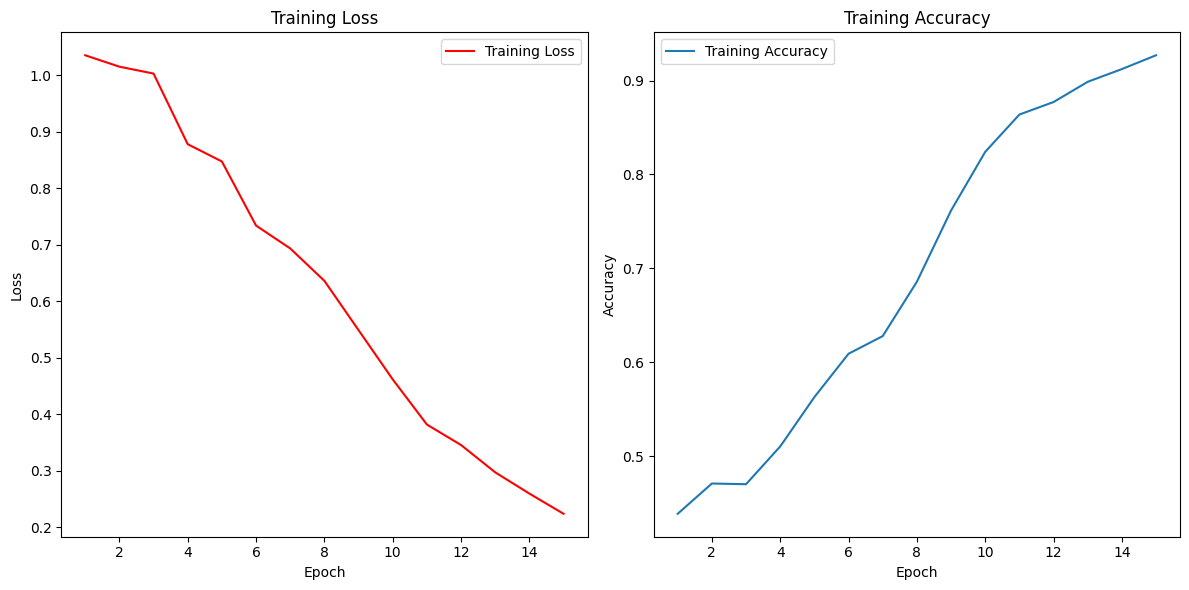

In [18]:
import matplotlib.pyplot as plt

# Lấy thông tin từ đối tượng history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss và Accuracy trên cùng một biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color = 'red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [67]:
callback_model = tf.keras.callbacks.ModelCheckpoint('model_cnn.keras', monitor='val_loss')
history = model.fit( x = x_train, y = y_train, epochs = 1, batch_size = 128, 
                    callbacks = [callback_model])


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9737 - loss: 0.0783


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7940 - loss: 0.9073
Test Loss: 0.8739743232727051
Test Accuracy: 0.8017928004264832
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


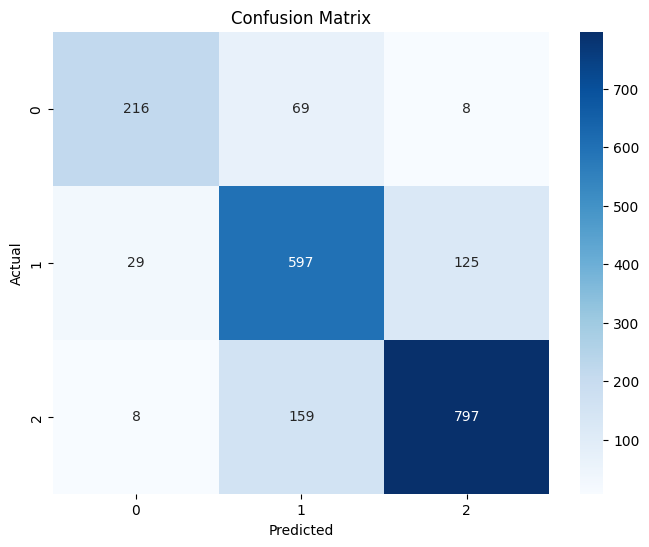

              precision    recall  f1-score   support

    Tiêu cực       0.85      0.74      0.79       293
   Trung lập       0.72      0.79      0.76       751
    Tích cực       0.86      0.83      0.84       964

    accuracy                           0.80      2008
   macro avg       0.81      0.79      0.80      2008
weighted avg       0.81      0.80      0.80      2008



In [68]:
# Load the best weights
model.load_weights('model_cnn.keras')

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict the test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print a classification report
report = classification_report(y_true, y_pred, target_names=label_dict.keys())
print(report)



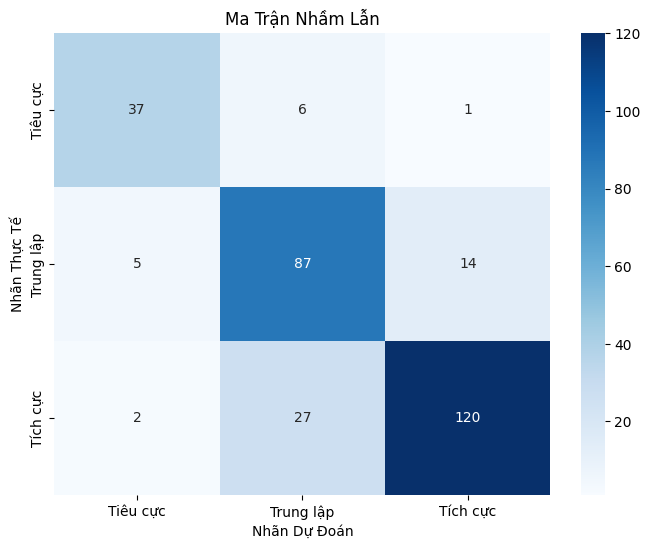

Báo cáo phân loại:
              precision    recall  f1-score   support

    Tiêu cực       0.84      0.84      0.84        44
   Trung lập       0.72      0.82      0.77       106
    Tích cực       0.89      0.81      0.85       149

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299



In [69]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pyvi import ViTokenizer

# Load model và tokenizer
my_model = load_model('model_cnn.keras')

with open("tokenizer_data.pkl", "rb") as input_file:
    my_tokenizer = pickle.load(input_file)

# Hàm xử lý đầu vào
def preprocess_raw_input(raw_input, tokenizer):
    input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(raw_input))
    input_text_pre = " ".join(input_text_pre)
    input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
    tokenizer_data_text = tokenizer.texts_to_sequences([input_text_pre_accent])
    vec_data = pad_sequences(tokenizer_data_text, padding='post', maxlen=820)
    return vec_data

# Hàm inference
def inference_model(input_feature, model):
    output = model(input_feature).numpy()[0]
    result = output.argmax()
    conf = float(output.max())
    label_dict = {0: 'Tiêu cực', 1: 'Trung lập', 2: 'Tích cực'}
    return label_dict[result], conf

# Hàm dự đoán
def prediction(raw_input, tokenizer, model):
    input_model = preprocess_raw_input(raw_input, tokenizer)
    result, _ = inference_model(input_model, model)
    return result

# Đọc file đầu vào
input_file_path = 'dulieumoi.xlsx'  # Đường dẫn file đầu vào
df = pd.read_excel(input_file_path)

# Kiểm tra dữ liệu đầu vào
if 'tweets' not in df.columns or 'camxuc' not in df.columns:
    raise ValueError("Tệp đầu vào cần có cột 'tweets' và 'camxuc'.")

# Áp dụng dự đoán
df['cnn'] = df['tweets'].apply(lambda x: prediction(x, my_tokenizer, my_model))



# Tính toán ma trận nhầm lẫn
y_true = df['camxuc']
y_pred = df['cnn']

confusion = confusion_matrix(y_true, y_pred, labels=['Tiêu cực', 'Trung lập', 'Tích cực'])

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tiêu cực', 'Trung lập', 'Tích cực'],
            yticklabels=['Tiêu cực', 'Trung lập', 'Tích cực'])
plt.xlabel('Nhãn Dự Đoán')
plt.ylabel('Nhãn Thực Tế')
plt.title('Ma Trận Nhầm Lẫn')
plt.show()

# Báo cáo chi tiết
report = classification_report(y_true, y_pred, output_dict=False)
print("Báo cáo phân loại:")
print(report)


In [11]:
text = input()
print(prediction(text, my_tokenizer, my_model)[0] +"\n")

đẹp nha nên mua.
Text preprocessed:  đẹp nha nên mua
Tích cực



In [ ]:
// Thêm chức năng mới: Báo cáo phân loại từ dữ liệu comment trên hệ thống ( vẽ kịch bản) = > cách thức làm
    1. Lấy dữ liệu
    2. Lưu file execlr
    3. Truyền dile vào model
    4. Lập báo cáo phân loại theo tiêu chí

In [ ]:
//Dùng vòng for duyet qua tập test xem kiem tra lai
//lập báo cáo đánh giá lại
gom lai thanh ham trong pycharm thanh file model 
Môt số mô hình phân loai cảm xác và ứng dụng (2-3 mô hình)
// bấm nút check tự dữ liệu 


In [ ]:
// Bổ sung phần sửa cral theo sp. Thống kê sản phẩm theo tiêu cực